# Breast Cancer Prediction Model

## About Dataset

Research Hypothesis: This study hypothesizes that there are significant associations between the diagnostic characteristics of patients, including age, menopause status, tumor size, presence of invasive nodes, affected breast, metastasis status, breast quadrant, history of breast conditions, and their breast cancer diagnosis result. Data Collection and Description:The dataset of 213 patient observations was obtained from the University of Calabar Teaching Hospital cancer registry over 24 months (January 2019–August 2021). The data includes eleven features: year of diagnosis, age, menopause status, tumor size in cm, number of invasive nodes, breast (left or right) affected, metastasis (yes or no), quadrant of the breast affected, history of breast disease, and diagnosis result (benign or malignant).Notable Findings:Upon preliminary examination, the data shows variations in diagnosis results across different patient features. A noticeable trend is the higher prevalence of malignant results among patients with larger tumor sizes and the presence of invasive nodes. Additionally, postmenopausal women seem to have a higher rate of malignant diagnoses.Interpretation and Usage:The data can be analyzed using statistical and machine learning techniques to determine the strength and significance of associations between patient characteristics and breast cancer diagnosis. This can contribute to predictive modeling for the early detection and diagnosis of breast cancer.However, the interpretation must consider potential limitations, such as missing data or bias in data collection. Furthermore, the data reflects patients from a single hospital, limiting the generalizability of the findings to wider populations.The data could be valuable for healthcare professionals, researchers, or policymakers interested in understanding breast cancer diagnosis factors and improving healthcare strategies for breast cancer. It could also be used in patient education about risk factors associated with breast cancer.

Features of the data Set
1. Year=The year diagnosis was conducted.
2. Age = Age of patient at the time of diagnose.
3. Menopause = Whether the patient is pro or postmenopausal at the time diagnose,0 MEANS THAT THE PATIENT HAS REACHED MENOPAUSE WHILE 1 MEANS THAT THE PATIENT HAS NOT REACHED MENOPAUSE YET.
4. Tumor size = The size in centimeter of the excised tumor.
5. Involved nodes = The number of axillary lymph nodes that contain metastatic,"CODED AS A BINARY DISTRI UTION OF EITHER PRESENT OR ASENT. 1 MEANS PRESENT, 0 MEANS ABSENT."
6. Breast = If it occurs on the left or right side,"CODED AS A BINARY DISTRIBUTION 1 MEANS THE CANCER HAS SPREAD, 0 MEANS IT HASN'T SPREAD YET."
7. Metastatic = If the cancer has spread to other part of the body or organ.
8. Breast quadrant = The gland is divided into 4 sections with nipple as a central point.
9. History = If the patient has any history or family history on cancer,"1 means there is a history of cancer , 0 means no history."
    
Target Variable
11. Diagnosis result = Instances of the breast cancer dataset.


# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd

## Libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sbn

import warnings
warnings.filterwarnings('ignore')

## Library for building validation framework
from sklearn.model_selection import train_test_split

# we are going to call the Logistic regression (Classification) model
from sklearn.linear_model import LogisticRegression

## Metrices
from sklearn.metrics import accuracy_score

## Categorical encoding
from sklearn.feature_extraction import DictVectorizer   # this will help convert cat. variable to numeric

## Decision tree
from sklearn.tree import DecisionTreeClassifier

# Random Regressor
from sklearn.ensemble import RandomForestClassifier 

# Adaboost Regressor
from sklearn.ensemble import AdaBoostClassifier

# bagging regressor
from sklearn.ensemble import BaggingClassifier

# gradient Boosting regressor
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Reading / Loading Data
data = pd.read_csv('Dataset/breast-cancer-dataset.csv')
data.T

,0,1,2,3,4,5,6,7,8,9,...,203,204,205,206,207,208,209,210,211,212
S/N,1,2,3,4,5,6,7,8,9,10,...,204,205,206,207,208,209,210,211,212,213
Year,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,...,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020
Age,40,39,45,26,21,50,58,21,35,42,...,39,49,16,61,40,49,28,22,19,50
Menopause,1,1,0,1,1,0,0,1,1,1,...,1,1,1,0,0,1,1,1,1,0
Tumor Size (cm),2,2,4,3,1,5,6,3,4,2,...,1,5,2,9,5,6,3,1,1,4
Inv-Nodes,0,0,0,0,0,1,1,0,0,0,...,0,1,0,1,1,3,0,0,0,0
Breast,Right,Left,Left,Left,Right,Right,Right,Left,Left,Right,...,Left,Right,Right,Right,Left,Right,Left,Left,Left,Right
Metastasis,0,0,0,0,0,1,1,0,0,0,...,0,1,0,1,1,1,0,0,0,0
Breast Quadrant,Upper inner,Upper outer,Lower outer,Lower inner,Upper outer,Lower outer,Upper outer,Upper inner,Upper outer,Lower outer,...,Lower outer,Upper outer,Upper inner,Upper outer,Lower outer,Lower inner,Upper inner,Upper outer,Lower inner,Lower outer
History,0,0,0,1,1,0,0,0,0,1,...,0,1,0,0,0,1,0,1,1,1


In [3]:
df=data.copy(deep=True)
df

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,3,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,4,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,5,2019,21,1,1,0,Right,0,Upper outer,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
208,209,2020,49,1,6,3,Right,1,Lower inner,1,Malignant
209,210,2020,28,1,3,0,Left,0,Upper inner,0,Benign
210,211,2020,22,1,1,0,Left,0,Upper outer,1,Benign
211,212,2020,19,1,1,0,Left,0,Lower inner,1,Benign


In [4]:
# Cropped the column s/n
df = df.drop('S/N', axis=1)

In [5]:
# Column headings change to lower case and spaces change to underscore
df.columns = df.columns.str.lower().str.replace(' ', '_')
df

,year,age,menopause,tumor_size_(cm),inv-nodes,breast,metastasis,breast_quadrant,history,diagnosis_result
0,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,2019,21,1,1,0,Right,0,Upper outer,1,Benign
...,...,...,...,...,...,...,...,...,...,...
208,2020,49,1,6,3,Right,1,Lower inner,1,Malignant
209,2020,28,1,3,0,Left,0,Upper inner,0,Benign
210,2020,22,1,1,0,Left,0,Upper outer,1,Benign
211,2020,19,1,1,0,Left,0,Lower inner,1,Benign


In [6]:
# Column headings with hyphen change to underscore
df.columns = df.columns.str.replace('-', '_')
df

,year,age,menopause,tumor_size_(cm),inv_nodes,breast,metastasis,breast_quadrant,history,diagnosis_result
0,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,2019,21,1,1,0,Right,0,Upper outer,1,Benign
...,...,...,...,...,...,...,...,...,...,...
208,2020,49,1,6,3,Right,1,Lower inner,1,Malignant
209,2020,28,1,3,0,Left,0,Upper inner,0,Benign
210,2020,22,1,1,0,Left,0,Upper outer,1,Benign
211,2020,19,1,1,0,Left,0,Lower inner,1,Benign


In [7]:
df.head().T

,0,1,2,3,4
year,2019,2019,2019,2019,2019
age,40,39,45,26,21
menopause,1,1,0,1,1
tumor_size_(cm),2,2,4,3,1
inv_nodes,0,0,0,0,0
breast,Right,Left,Left,Left,Right
metastasis,0,0,0,0,0
breast_quadrant,Upper inner,Upper outer,Lower outer,Lower inner,Upper outer
history,0,0,0,1,1
diagnosis_result,Benign,Benign,Benign,Benign,Benign


In [8]:
df.tail().T

,208,209,210,211,212
year,2020,2020,2020,2020,2020
age,49,28,22,19,50
menopause,1,1,1,1,0
tumor_size_(cm),6,3,1,1,4
inv_nodes,3,0,0,0,0
breast,Right,Left,Left,Left,Right
metastasis,1,0,0,0,0
breast_quadrant,Lower inner,Upper inner,Upper outer,Lower inner,Lower outer
history,1,0,1,1,1
diagnosis_result,Malignant,Benign,Benign,Benign,Benign


In [9]:
df.iloc[30:50, ]

,year,age,menopause,tumor_size_(cm),inv_nodes,breast,metastasis,breast_quadrant,history,diagnosis_result
30,2019,56,0,9,1,Left,1,#,0,Malignant
31,2019,48,0,7,1,Right,1,Upper outer,0,Malignant
32,2019,40,1,2,0,Left,1,Upper outer,0,Malignant
33,2019,35,1,1,0,Left,0,Lower inner,0,Benign
34,2019,31,1,6,1,Right,1,Upper inner,1,Malignant
35,2019,21,1,2,0,Right,1,Lower inner,0,Benign
36,2019,61,0,4,1,Right,1,Lower outer,1,Malignant
37,2019,50,0,5,0,Left,0,Lower outer,0,Benign
38,2019,20,1,3,0,Left,0,Upper outer,0,Benign
39,2019,45,1,5,1,Left,1,Upper inner,0,Malignant


In [10]:
# checking unique characters
df.nunique()

year                 3
age                 58
menopause            2
tumor_size_(cm)     13
inv_nodes            4
breast               3
metastasis           3
breast_quadrant      6
history              3
diagnosis_result     2
dtype: int64

In [11]:
# Checking Missing Values
df.isnull().sum()

year                0
age                 0
menopause           0
tumor_size_(cm)     0
inv_nodes           0
breast              0
metastasis          0
breast_quadrant     0
history             0
diagnosis_result    0
dtype: int64

In [12]:
# Information the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              213 non-null    object
 1   age               213 non-null    int64 
 2   menopause         213 non-null    int64 
 3   tumor_size_(cm)   213 non-null    object
 4   inv_nodes         213 non-null    object
 5   breast            213 non-null    object
 6   metastasis        213 non-null    object
 7   breast_quadrant   213 non-null    object
 8   history           213 non-null    object
 9   diagnosis_result  213 non-null    object
dtypes: int64(2), object(8)
memory usage: 16.8+ KB


In [13]:
# Special character here
df['year'].unique()

array(['2019', '#', '2020'], dtype=object)

In [14]:
df['age'].unique()

array([40, 39, 45, 26, 21, 50, 58, 35, 42, 41, 43, 30, 33, 38, 60, 47, 57,
       34, 31, 36, 56, 48, 61, 20, 37, 27, 25, 17, 23, 59, 67, 46, 24, 49,
       53, 28, 68, 64, 18, 14, 15, 54, 71, 55, 22, 65, 19, 52, 51, 44, 63,
       29, 32, 62, 69, 13, 16, 77])

In [15]:
df['menopause'].unique()

array([1, 0])

In [16]:
# special character here
df['tumor_size_(cm)'].unique()

array(['2', '4', '3', '1', '5', '6', '7', '10', '8', '9', '#', '14', '12'],
      dtype=object)

In [17]:
# special character here
df['inv_nodes'].unique()

array(['0', '1', '#', '3'], dtype=object)

In [18]:
# special character here
df['breast'].unique()

array(['Right', 'Left', '#'], dtype=object)

In [19]:
# special character here
df['metastasis'].unique()

array(['0', '1', '#'], dtype=object)

In [20]:
# special character here
df['breast_quadrant'].unique()

array(['Upper inner', 'Upper outer', 'Lower outer', 'Lower inner', '#',
       'Upper outer '], dtype=object)

In [21]:
# special character here
df['history'].unique()

array(['0', '1', '#'], dtype=object)

In [22]:
# no special character here
df['diagnosis_result'].unique()

array(['Benign', 'Malignant'], dtype=object)

In [23]:
# Checking data type
df.dtypes

year                object
age                  int64
menopause            int64
tumor_size_(cm)     object
inv_nodes           object
breast              object
metastasis          object
breast_quadrant     object
history             object
diagnosis_result    object
dtype: object

# Re-Assigning data types

In [24]:
df['year'] = df['year'].astype('category')

In [25]:
df.dtypes

year                category
age                    int64
menopause              int64
tumor_size_(cm)       object
inv_nodes             object
breast                object
metastasis            object
breast_quadrant       object
history               object
diagnosis_result      object
dtype: object

In [26]:
df['menopause'] = df['menopause'].astype('category')

In [27]:
df['tumor_size_(cm)'].replace('#', np.nan, inplace = True)

In [28]:
df['tumor_size_(cm)'] = df['tumor_size_(cm)'].astype('float64')

In [29]:
df.dtypes

year                category
age                    int64
menopause           category
tumor_size_(cm)      float64
inv_nodes             object
breast                object
metastasis            object
breast_quadrant       object
history               object
diagnosis_result      object
dtype: object

In [30]:
#df['inv_nodes'] = pd.to_numeric(df['inv_nodes'], errors='coerce')

In [31]:
#df['inv_nodes'] = df['inv_nodes'].astype('int64')

In [32]:
categorical_cols = ['breast','inv_nodes','metastasis', 'breast_quadrant', 'diagnosis_result', 'history']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [33]:
df.dtypes

year                category
age                    int64
menopause           category
tumor_size_(cm)      float64
inv_nodes           category
breast              category
metastasis          category
breast_quadrant     category
history             category
diagnosis_result    category
dtype: object

In [34]:
df.isnull().sum()

year                0
age                 0
menopause           0
tumor_size_(cm)     1
inv_nodes           0
breast              0
metastasis          0
breast_quadrant     0
history             0
diagnosis_result    0
dtype: int64

In [35]:
for each_name in df.columns:
    print(each_name)
    print(df[each_name].unique())

year
['2019', '#', '2020']
Categories (3, object): ['#', '2019', '2020']
age
[40 39 45 26 21 50 58 35 42 41 43 30 33 38 60 47 57 34 31 36 56 48 61 20
 37 27 25 17 23 59 67 46 24 49 53 28 68 64 18 14 15 54 71 55 22 65 19 52
 51 44 63 29 32 62 69 13 16 77]
menopause
[1, 0]
Categories (2, int64): [0, 1]
tumor_size_(cm)
[ 2.  4.  3.  1.  5.  6.  7. 10.  8.  9. nan 14. 12.]
inv_nodes
['0', '1', '#', '3']
Categories (4, object): ['#', '0', '1', '3']
breast
['Right', 'Left', '#']
Categories (3, object): ['#', 'Left', 'Right']
metastasis
['0', '1', '#']
Categories (3, object): ['#', '0', '1']
breast_quadrant
['Upper inner', 'Upper outer', 'Lower outer', 'Lower inner', '#', 'Upper outer ']
Categories (6, object): ['#', 'Lower inner', 'Lower outer', 'Upper inner', 'Upper outer', 'Upper outer ']
history
['0', '1', '#']
Categories (3, object): ['#', '0', '1']
diagnosis_result
['Benign', 'Malignant']
Categories (2, object): ['Benign', 'Malignant']


# Handling UNIQUE AND MISSING values

In [36]:
df['year'].replace('#', np.nan, inplace = True)

In [37]:
df['breast'].replace('#', np.nan, inplace = True)
df['inv_nodes'].replace('#', np.nan, inplace = True)
df['metastasis'].replace('#', np.nan, inplace = True)
df['breast_quadrant'].replace('#', np.nan, inplace = True)
df['history'].replace('#', np.nan, inplace = True)

In [38]:
df['tumor_size_(cm)'] = df['tumor_size_(cm)'].fillna(df['tumor_size_(cm)'].mean())
df['year'] = df['year'].fillna(df['year'].value_counts().index[0])
df['inv_nodes'] = df['inv_nodes'].fillna(df['inv_nodes'].value_counts().index[0])
df['breast'] = df['breast'].fillna(df['breast'].value_counts().index[0])
df['metastasis'] = df['metastasis'].fillna(df['metastasis'].value_counts().index[0])
df['breast_quadrant'] = df['breast_quadrant'].fillna(df['breast_quadrant'].value_counts().index[0])
df['history'] = df['history'].fillna(df['history'].value_counts().index[0])

In [39]:
df.isnull().sum()

year                0
age                 0
menopause           0
tumor_size_(cm)     0
inv_nodes           0
breast              0
metastasis          0
breast_quadrant     0
history             0
diagnosis_result    0
dtype: int64

In [40]:
df.dtypes

year                category
age                    int64
menopause           category
tumor_size_(cm)      float64
inv_nodes           category
breast              category
metastasis          category
breast_quadrant     category
history             category
diagnosis_result    category
dtype: object

In [41]:
## lets convert the target column, where Benign == 1 and Malignant = 0
df.diagnosis_result = (df.diagnosis_result == 'Benign').astype(int)

# exploratory analysis

In [42]:
# Descriptive analysis
df.describe().round()

,age,tumor_size_(cm),diagnosis_result
count,213.0,213.0,213.0
mean,40.0,4.0,1.0
std,14.0,3.0,0.0
min,13.0,1.0,0.0
25%,30.0,2.0,0.0
50%,40.0,4.0,1.0
75%,49.0,6.0,1.0
max,77.0,14.0,1.0


In [43]:
numerical_cols = df.select_dtypes(include = ['int', 'float'])
corr_matrix = numerical_cols.corr()
corr_matrix['tumor_size_(cm)']

age                 0.497234
tumor_size_(cm)     1.000000
diagnosis_result   -0.688803
Name: tumor_size_(cm), dtype: float64

# EDA: Visualizing the distribution of numerical features

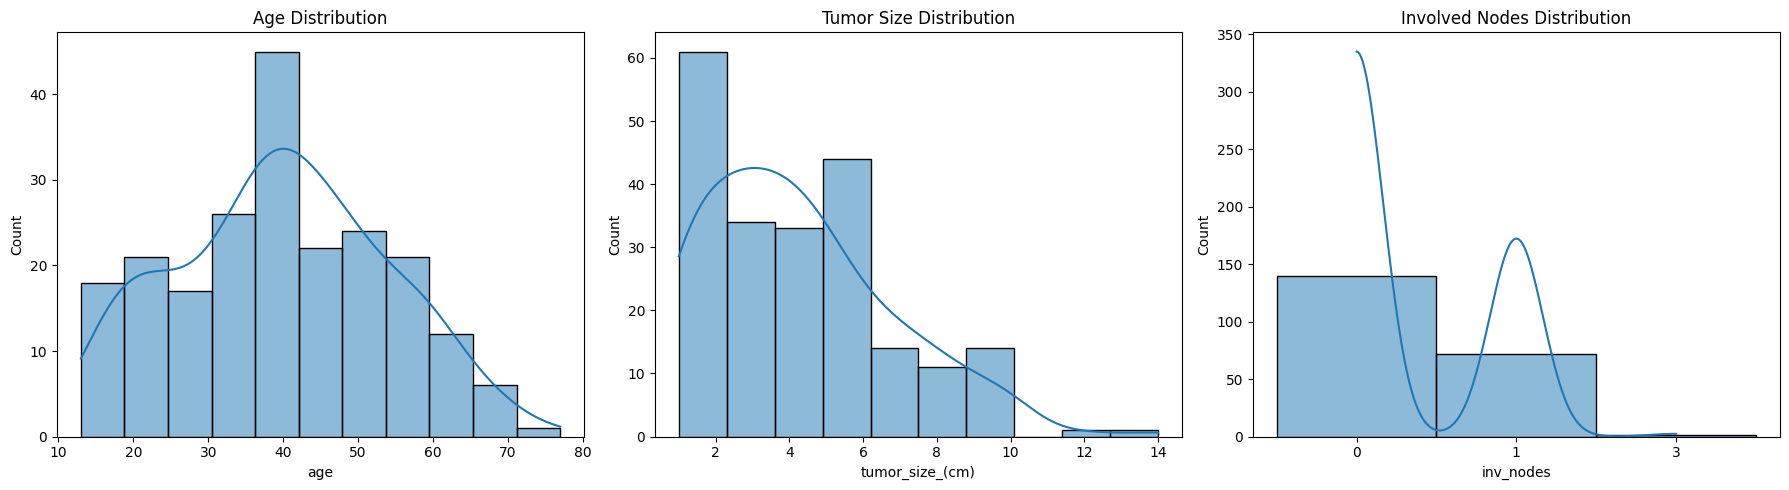

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sbn.histplot(df['age'], kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

sbn.histplot(df['tumor_size_(cm)'], kde=True, ax=axes[1])
axes[1].set_title('Tumor Size Distribution')

sbn.histplot(df['inv_nodes'], kde=True, ax=axes[2])
axes[2].set_title('Involved Nodes Distribution')

plt.tight_layout()
plt.show()

# Pairplot to visualize relationships between numerical features and the target
#sbn.pairplot(df, hue='diagnosis_result', vars=['age', 'tumor_size_(cm)'])
#plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

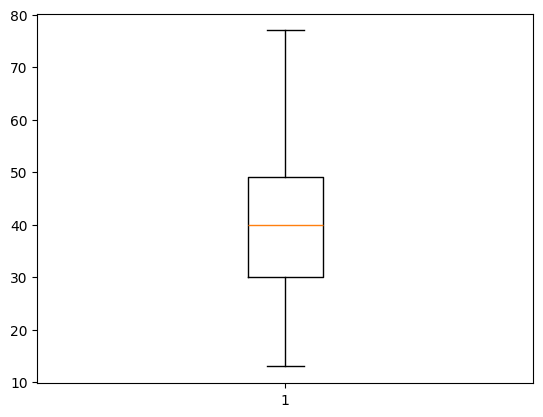

In [45]:
# Box Plot
plt.boxplot(df['age'])
plt.show

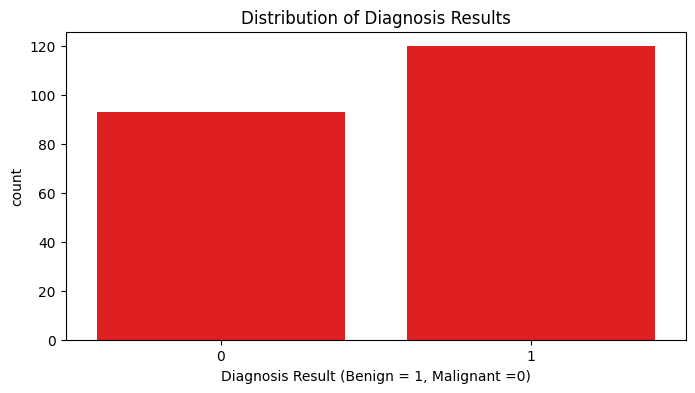

In [46]:
plt.figure(figsize = (8,4))
plt.title('Distribution of Diagnosis Results')
plt.xlabel('Diagnosis Result (Benign = 1, Malignant =0)')
sbn.countplot(x='diagnosis_result', data=df, color = 'Red')
plt.show()

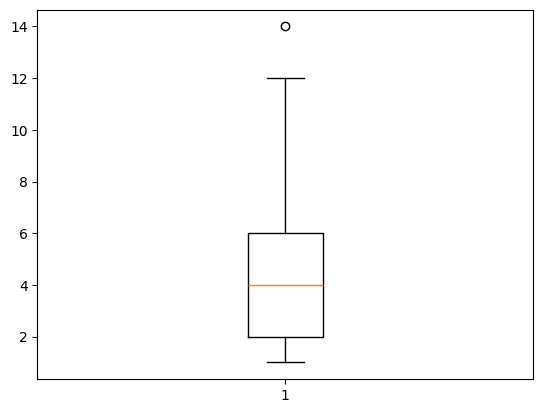

In [47]:
# Box plot for Tumor size
plt.boxplot(df['tumor_size_(cm)'])
plt.show()

# Building a validation framework

In [48]:
# Spliting data
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11) # the number 11 is arbitral, you can use any integer
df_train, df_valid = train_test_split(df_train_full, test_size=0.25, random_state=11)  # the random state can be change to give a better accuracy

print(f'Size of Training Dataset: {len(df_train)}')
print(f'Size of validation Dataset: {len(df_valid)}')
print(f'Size of Testing Dataset: {len(df_test)}')
# print(f'Size of Training dataset: {}')

Size of Training Dataset: 127
Size of validation Dataset: 43
Size of Testing Dataset: 43


# Selection of target column

In [49]:
# create new variables and assign them to our target variables and features after which we will delete from the main dataframe
# y-lables are the actual prediction y^ is ..
y_train = df_train['diagnosis_result'].values
y_valid = df_valid['diagnosis_result'].values
y_test = df_test['diagnosis_result'].values

In [50]:
df_train_bl = df_train.drop('diagnosis_result', axis=1)
df_valid_bl = df_valid.drop('diagnosis_result', axis=1)
df_test_bl = df_test.drop('diagnosis_result', axis=1)

In [51]:
## select only numerical featues 
df_train_bl = df_train_bl.select_dtypes(include=['int', 'float'])
df_valid_bl = df_valid_bl.select_dtypes(include=['int', 'float'])

In [52]:
## convert the numerical features into numpy array
X_train_bl = df_train_bl.values
X_valid_bl = df_valid_bl.values

In [53]:
## instantiate a logistic regression algorithm 
bl_model = LogisticRegression(solver='liblinear', random_state=11)

## fit the training data to the algorithm 
bl_model.fit(X_train_bl, y_train)

LogisticRegression(random_state=11, solver='liblinear')

In [54]:
y_valid_pred = bl_model.predict(X_valid_bl)

In [55]:
# Computing the accuracy of the validation prediction using Accuracy score matrics 
acc_bl = accuracy_score(y_valid, y_valid_pred)
print(f'Validation Accuracy Score for bl model: : {round(acc_bl, 2)*100} %')

Validation Accuracy Score for bl model: : 88.0 %


# Including all Features in the Model

In [56]:
## select all features 
df_train_bl2 = df_train_bl.select_dtypes(exclude=[object])
df_valid_bl2 = df_valid_bl.select_dtypes(exclude=[object])

In [57]:
# Convert our dataframe to a dictionary
dict_train_bl = df_train_bl2.to_dict(orient = 'records')
dict_valid_bl = df_valid_bl2.to_dict(orient = 'records')

In [58]:
## create an instance
dv = DictVectorizer(sparse=False) # sparse should be set to false
dv.fit(dict_train_bl)

DictVectorizer(sparse=False)

In [59]:
X_train_bl = dv.transform(dict_train_bl)
X_valid_bl = dv.transform(dict_valid_bl)

# Model training
- Logistic Regression
- Adaboost Classifier
- Gradient Boosting classifier
- Decission Tree
- Bagging Classifier
- Random Forest Classifier

# Logistic Regression

In [60]:
# Logistic Regression Model
lr_bl_1_model = LogisticRegression(random_state=11)
lr_bl_1_model.fit(X_train_bl, y_train)

LogisticRegression(random_state=11)

In [61]:
#lr_bl_1_model.coef_

In [62]:
y_valid_pred_bl = lr_bl_1_model.predict(X_valid_bl)

In [63]:
# Computing the accuracy of the validation prediction using Accuracy score matrics 
lr_acc_bl = accuracy_score(y_valid, y_valid_pred_bl)
print(f'Validation Accuracy Score for bl model: : {round(lr_acc_bl, 2)*100} %')

Validation Accuracy Score for bl model: : 86.0 %


# Decision Tree

In [64]:
## Create Instance
dt_model_bl = DecisionTreeClassifier(random_state=11)
dt_model_bl.fit(X_train_bl, y_train)

DecisionTreeClassifier(random_state=11)

In [65]:
## Generate validation prediction
y_valid_pred = dt_model_bl.predict(X_valid_bl)

In [66]:
dt_acc_bl = accuracy_score(y_valid, y_valid_pred)
print(f'Decision Tree Baseline Validaion Metric {round(dt_acc_bl, 2)* 100}%')

Decision Tree Baseline Validaion Metric 77.0%


# Random Forest Classifier

In [67]:
rf_model_bl = RandomForestClassifier(random_state=11)
rf_model_bl.fit(X_train_bl, y_train)

RandomForestClassifier(random_state=11)

In [68]:
y_valid_pred_rf = rf_model_bl.predict(X_valid_bl)

In [69]:
rf_acc_bl = accuracy_score(y_valid, y_valid_pred_rf)
print(f'Random Forest classifier Baseline Validation Metric {round(rf_acc_bl, 2)*100}%')

Random Forest classifier Baseline Validation Metric 74.0%


# Adaboost Classifier

In [70]:
ac_model_bl = AdaBoostClassifier(random_state=11)
ac_model_bl.fit(X_train_bl, y_train)

AdaBoostClassifier(random_state=11)

In [71]:
y_valid_pred_ac = ac_model_bl.predict(X_valid_bl)

In [72]:
ac_acc_bl = accuracy_score(y_valid, y_valid_pred_ac)
print(f'Adaboost classifier Baseline Validation Metric {round(ac_acc_bl, 2)*100}%')

Adaboost classifier Baseline Validation Metric 79.0%


# Bagging Classifier


In [73]:
bc_model_bl = BaggingClassifier(random_state=11)
bc_model_bl.fit(X_train_bl, y_train)

BaggingClassifier(random_state=11)

In [74]:
y_valid_pred_bc = bc_model_bl.predict(X_valid_bl)

In [75]:
bc_acc_bl = accuracy_score(y_valid, y_valid_pred_bc)
print(f'Bagging classifier Baseline Validation Metric {round(bc_acc_bl, 2)*100}%')

Bagging classifier Baseline Validation Metric 74.0%


# Gradient Boosting Classifier

In [76]:
gb_model_bl = GradientBoostingClassifier(random_state=11)
gb_model_bl.fit(X_train_bl, y_train)

GradientBoostingClassifier(random_state=11)

In [77]:
y_valid_pred_gb = gb_model_bl.predict(X_valid_bl)

In [78]:
gb_acc_bl = accuracy_score(y_valid, y_valid_pred_gb)
print(f'Gradient Boosting classifier Baseline Validation Metric {round(gb_acc_bl, 2)*100}%')

Gradient Boosting classifier Baseline Validation Metric 74.0%


# Training and Testing Final Model

In [79]:
## Select int, float, category features 
df_train_fm = df_train_full.select_dtypes(include=['int', 'float', 'category'])
df_test_fm = df_test.select_dtypes(include=['int', 'float', 'category'])

In [80]:
y_train_fm = df_train_full['diagnosis_result'].values
y_test_fm = df_test['diagnosis_result'].values

In [81]:
df_train_full = df_train_full.drop('diagnosis_result', axis=1)

In [82]:
## Convert to a dictionary format
dict_train_fm = df_train_fm.to_dict(orient='records')
dict_test_fm = df_test_fm.to_dict(orient='records')

In [83]:
## Training a dictvector
dv = DictVectorizer(sparse=False)
dv.fit(dict_train_fm)

DictVectorizer(sparse=False)

In [84]:
## transform to  matrix format
X_train_fm = dv.transform(dict_train_fm)
X_test_fm = dv.transform(dict_test_fm)

In [85]:
#gb_model_fm = GradientBoostingClassifier(random_state=11)
#gb_model_fm.fit(X_train_fm, y_train_fm)

In [86]:
gb_model_fm = LogisticRegression(solver = 'liblinear', random_state=11)
gb_model_fm.fit(X_train_fm, y_train_fm)

LogisticRegression(random_state=11, solver='liblinear')

In [87]:
y_test_pred_fm = gb_model_fm.predict(X_test_fm)

In [88]:
gb_acc_fm = accuracy_score(y_test_fm, y_test_pred_fm)
print(f'Gradient Boosting classifier Final Model Test {round(gb_acc_fm, 2)*100}%')

Gradient Boosting classifier Final Model Test 100.0%


In [95]:
# Import Pickle Library
import pickle
with open("Breast_Cancer.bin","wb") as f_out:
    pickle.dump((dv,gb_model_fm), f_out)

# Load the Model

In [90]:
with open("Breast_Cancer.bin", "rb") as f_in:
    dv,model=pickle.load(f_in)

In [91]:
# Predict with patient information
patient={
    "year": 2020,
    "age":35,
    "menopause":1,
    "tumor_size_(cm)":6,
    "inv_nodes":0,
    "breast":"Right",
    "metastasis":1,
    "breast_quadrant":"Upper inner",
    "history":0
}

In [92]:
# Let's crete a function to make a single prediction
def predict_single(df,dv,model):
    X=dv.transform([patient])
    y_pred=model.predict(X)
    return y_pred

In [93]:
# Let's call the function to make the prediction
prediction=predict_single(patient,dv,model)
print(f'{prediction}')

[0]


In [94]:
# lets make the prediction by setting the threshold and returning the verdict
# 'prediction: Benign' , 'prediction: Malignant'
if prediction == 0:
    print('Malignant') 
else:
    print('Benign')

Malignant
